In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
file_path = 'C:\\Users\\lynet\\Downloads\\vehicle.csv' 
vehicle_data = pd.read_csv(file_path)

# Display the first few rows
print(vehicle_data.head())


   COMPACTNESS  CIRCULARITY  'DISTANCE CIRCULARITY'  'RADIUS RATIO'  \
0           95           48                      83             178   
1           91           41                      84             141   
2          104           50                     106             209   
3           93           41                      82             159   
4           85           44                      70             205   

   'PR.AXIS ASPECT RATIO'  'MAX.LENGTH ASPECT RATIO'  'SCATTER RATIO'  \
0                      72                         10              162   
1                      57                          9              149   
2                      66                         10              207   
3                      63                          9              144   
4                     103                         52              149   

   ELONGATEDNESS  'PR.AXIS RECTANGULARITY'  'MAX.LENGTH RECTANGULARITY'  \
0             42                        20                 

In [5]:

# Drop non-numeric columns or handle them as needed
vehicle_data = vehicle_data.select_dtypes(include=[np.number]).dropna()

# Normalize the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(vehicle_data)


In [7]:
def spectral_clustering_experiment(data, gamma_values, n_clusters):
    silhouette_scores = []
    
    for gamma in gamma_values:
        clustering = SpectralClustering(n_clusters=n_clusters, affinity='rbf', gamma=gamma)
        labels = clustering.fit_predict(data)
        
        # Calculate the silhouette score
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
        
        print(f'Gamma: {gamma}, Silhouette Score: {score}')
        
    return silhouette_scores


In [9]:
# Define gamma values and number of clusters
gamma_values = [0.1, 0.5, 1.0, 2.0]  
n_clusters = 3  

# Run the experiment
scores = spectral_clustering_experiment(scaled_data, gamma_values, n_clusters)


C:\Users\lynet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\lynet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Gamma: 0.1, Silhouette Score: 0.4041958779199085
Gamma: 0.5, Silhouette Score: 0.5394688513536627
Gamma: 1.0, Silhouette Score: 0.5394688513536627


C:\Users\lynet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Gamma: 2.0, Silhouette Score: 0.5394688513536627


C:\Users\lynet\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


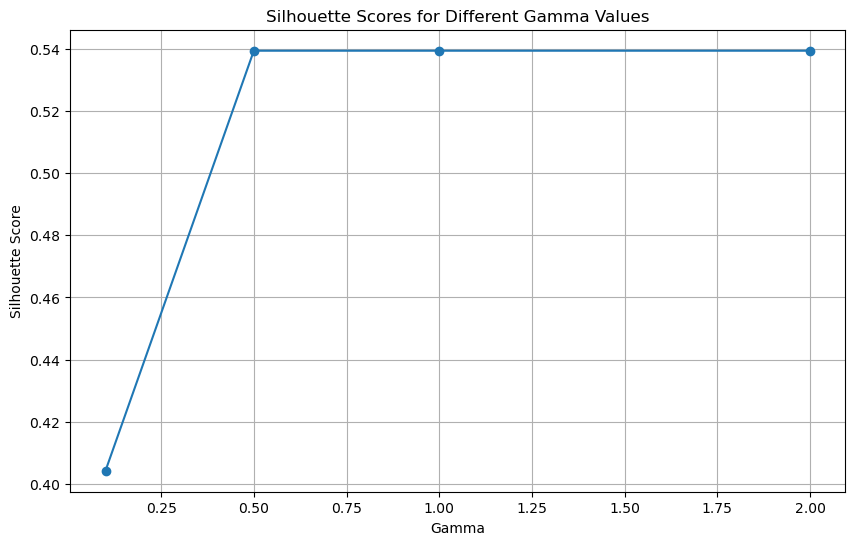

In [11]:
# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, scores, marker='o')
plt.title('Silhouette Scores for Different Gamma Values')
plt.xlabel('Gamma')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()
